<a href="https://colab.research.google.com/github/BillBs-13/AppML/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 8: Lab to understand Kmeans clustering
## Prepared by Anum Paracha
## 17-07-2025

## **Step 1**: Generate Synthetic Dataset
We'll first create a simple 2D dataset with 500 points and 4 centers.





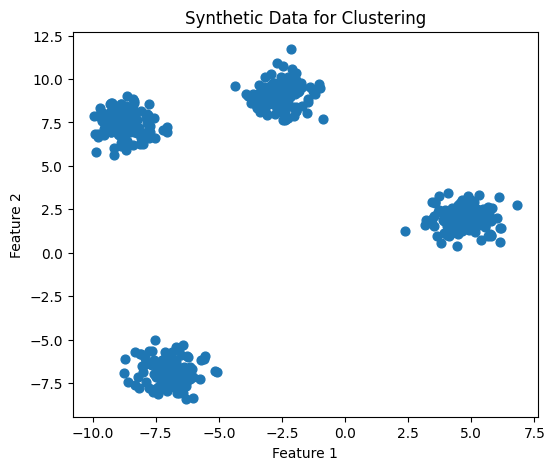

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)

# Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title('Synthetic Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **Step 2**: Find the optimal number of clusters using **Elbow Method**

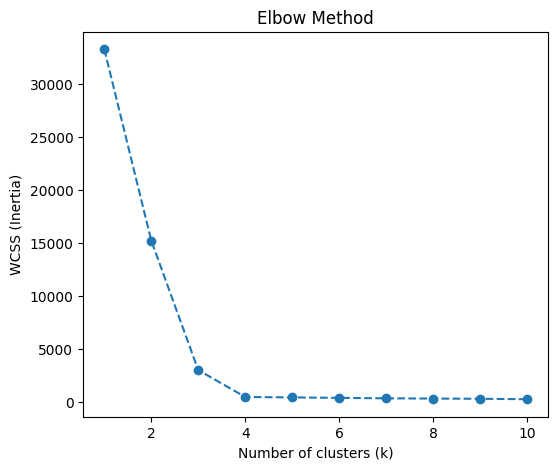

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

## Step 3: Evaluate the performance of the model using **Silhoutte score**

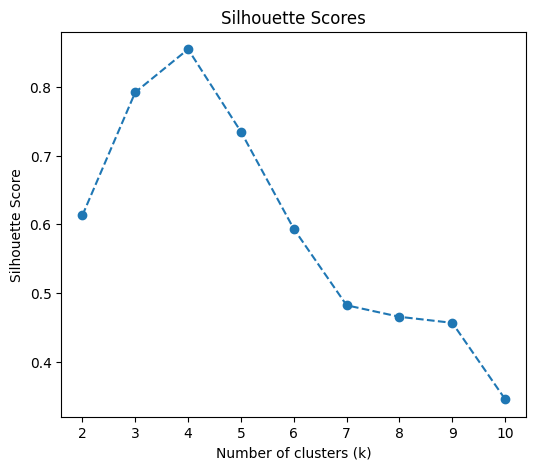

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), sil_scores, 'o--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

## Step 4: Train model using Kmeans clustering and visualise it

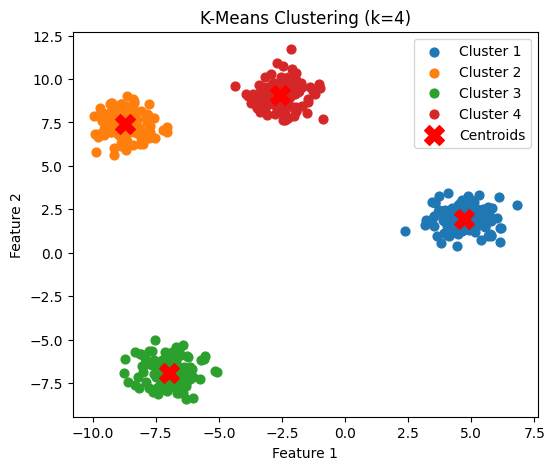

In [ ]:
# Based on the above, choose k=4
optimal_k = 4
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = km.fit_predict(X)
centroids = km.cluster_centers_

plt.figure(figsize=(6, 5))
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=40, label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

***Task1*** Please download the dataset given in **Week 8** on the **moodle page**.
Perform some EDA to analsye the given unlabeled dataset and answer:

1.   How many features are there in the dataset
2.   Can we use the dataset for a **clsutering algorithm (Kmeans)**

1- There are 6 features
2- yes we can, since the dataset has no target so we can apply unsupervised algorithms on it, also it has numerical data and no missing values as we can see below.

🔹 Dataset Shape: (200, 7)

🔹 Data Types:
 Unnamed: 0         int64
duration         float64
src_bytes        float64
dst_bytes        float64
failed_logins    float64
count            float64
srv_count        float64
dtype: object

🔹 Missing Values:
 Unnamed: 0       0
duration         0
src_bytes        0
dst_bytes        0
failed_logins    0
count            0
srv_count        0
dtype: int64
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     200 non-null    int64  
 1   duration       200 non-null    float64
 2   src_bytes      200 non-null    float64
 3   dst_bytes      200 non-null    float64
 4   failed_logins  200 non-null    float64
 5   count          200 non-null    float64
 6   srv_count      200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB
None

Summary Statistics:
       Unnam

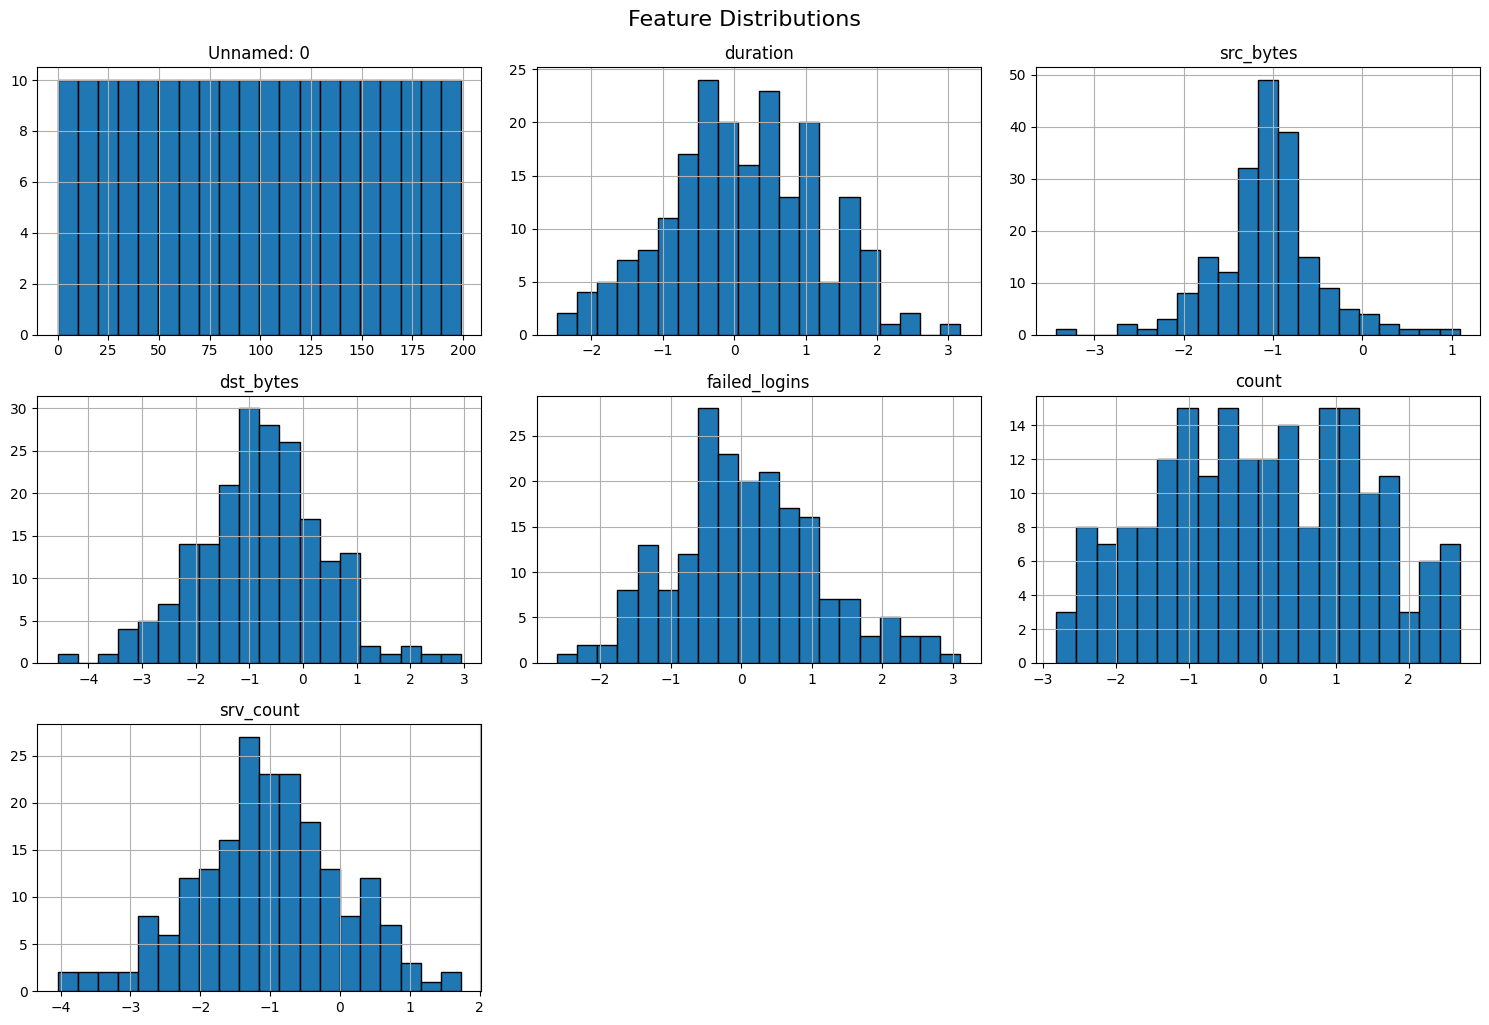

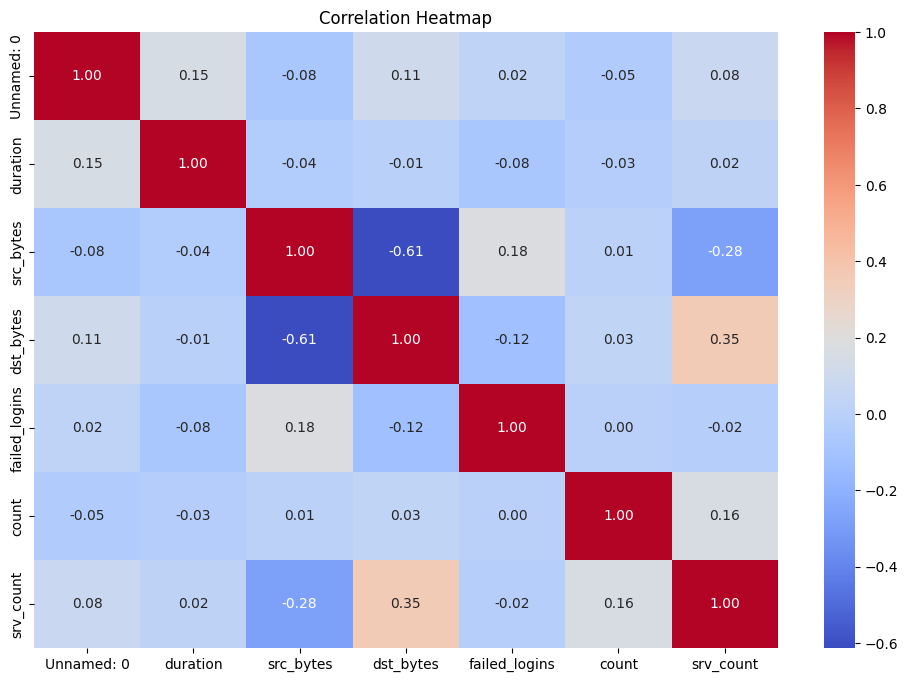

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("dataset.csv")  # make sure the file is in your working directory

#Basic Data Summary ----------------
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())
# Display basic information
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst 5 Rows:")
print(df.head())


# Plot histograms
df[numeric_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
plt.show()

# -------- Correlation Heatmap ----------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


***Task2***

Write a paragraph describing the dataset.

In [ ]:
# Task2 answer here

***Task3***

* Read the dataset using Panda and present some features.
* Make sure you use EDA to demonstrate the features in the dataset.


In [ ]:
# Task 3 answer here

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Names:\n", df.columns.tolist())
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Summary Statistics:\n", df.describe())






🔹 Dataset Shape: (200, 7)

🔹 Column Names:
 ['Unnamed: 0', 'duration', 'src_bytes', 'dst_bytes', 'failed_logins', 'count', 'srv_count']

🔹 Data Types:
 Unnamed: 0         int64
duration         float64
src_bytes        float64
dst_bytes        float64
failed_logins    float64
count            float64
srv_count        float64
dtype: object

🔹 First 5 Rows:
    Unnamed: 0  duration  src_bytes  dst_bytes  failed_logins     count  \
0           0 -0.066390  -0.907127  -0.921672       0.316200  1.112164   
1           1 -0.810073  -0.625739  -1.282936       0.599994 -0.095576   
2           2 -2.481295   0.671286  -2.689684       1.626519 -0.753272   
3           3  1.089437  -1.206856   0.571102       0.173908  2.296566   
4           4  0.177756  -0.829075  -2.002084       1.494689  1.617081   

   srv_count  
0  -1.484307  
1  -0.756345  
2  -2.666897  
3  -0.940681  
4  -0.188140  

🔹 Summary Statistics:
        Unnamed: 0    duration   src_bytes   dst_bytes  failed_logins  \
count  200

***Task4***

* Apply kmeans clustering algorithms to identify clusters or groups in the dataset.
* Make sure to follow Scikit learn library.
* Make sure you save your models.
* Use Elbow method and identify the best number of clusters
* Calculate the silhouette score and sum of square error (SSE) of the model and explain how this score evaluate the performance of the clustering model.

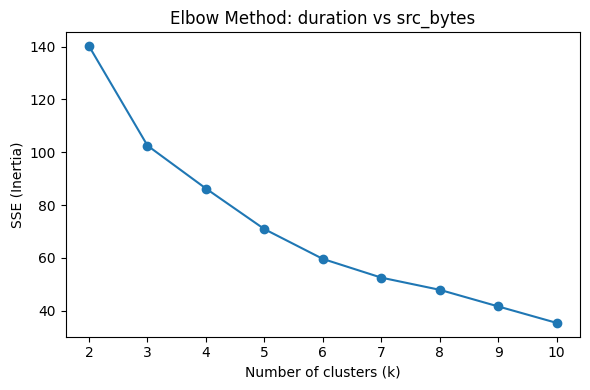

🔸 Features: duration, src_bytes
➡️ SSE (Inertia): 102.5020085779013
➡️ Silhouette Score: 0.3529


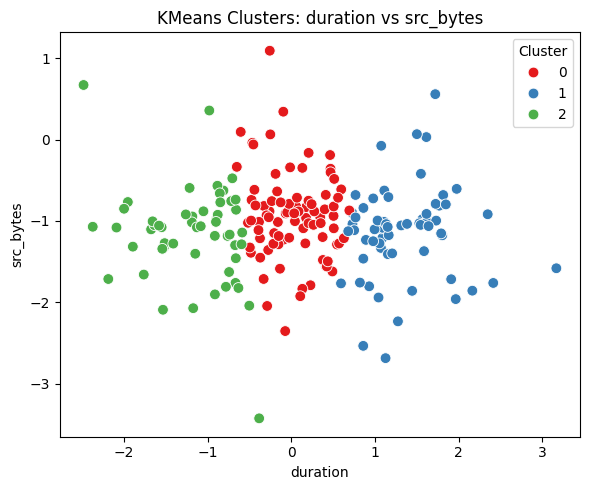

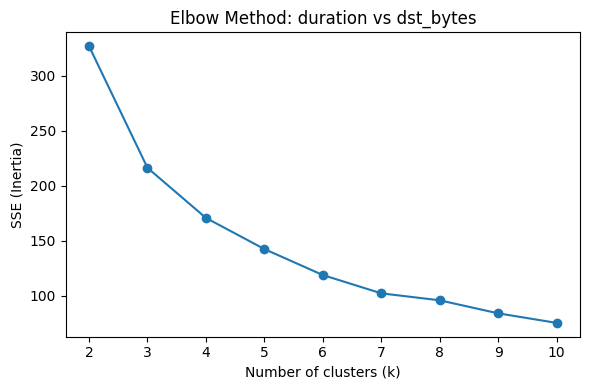

🔸 Features: duration, dst_bytes
➡️ SSE (Inertia): 216.30611062488308
➡️ Silhouette Score: 0.3424


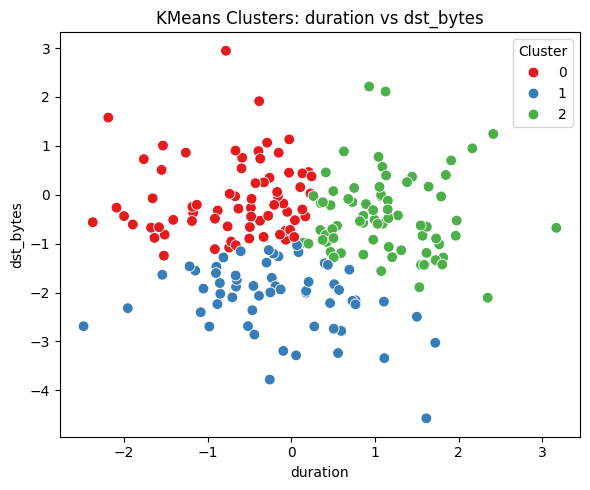

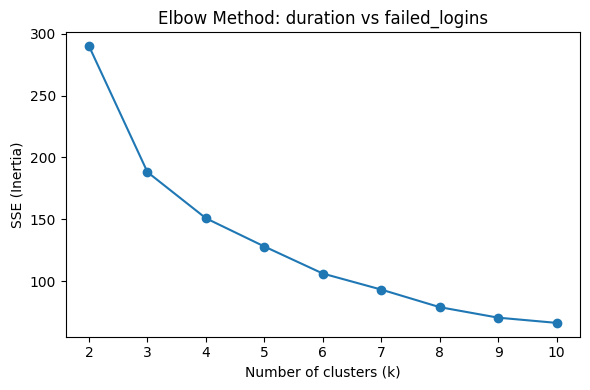

🔸 Features: duration, failed_logins
➡️ SSE (Inertia): 188.07942992502643
➡️ Silhouette Score: 0.3626


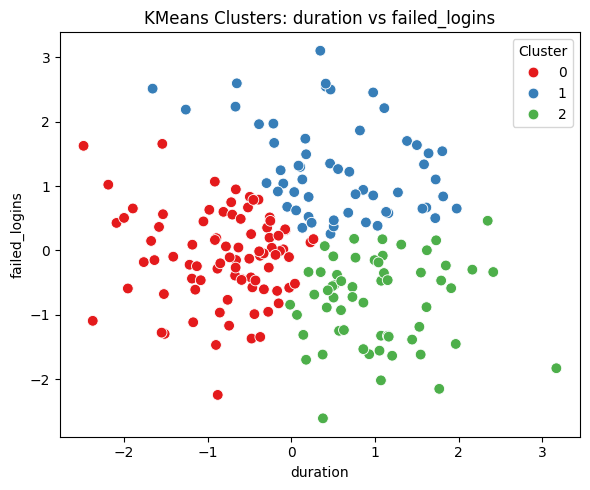

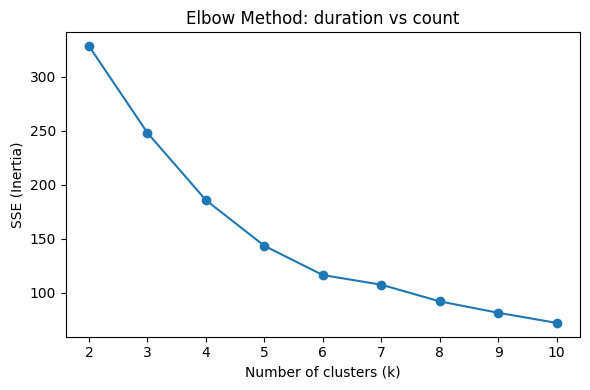

🔸 Features: duration, count
➡️ SSE (Inertia): 247.88084076022426
➡️ Silhouette Score: 0.3480


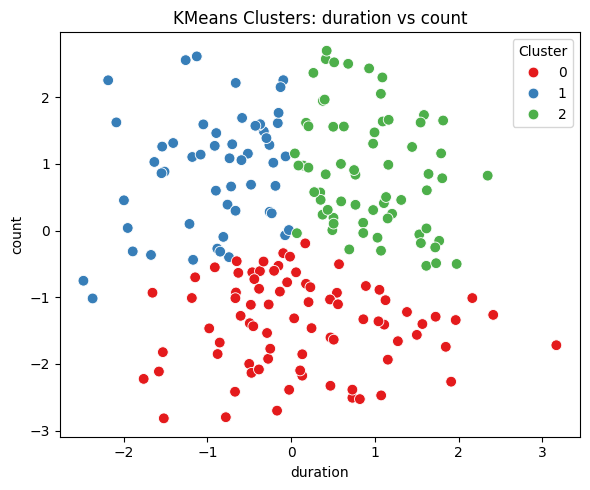

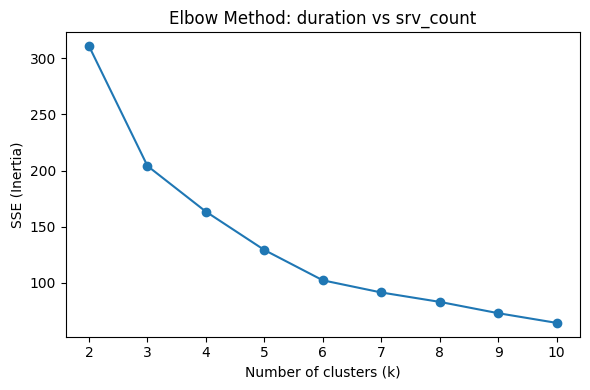

🔸 Features: duration, srv_count
➡️ SSE (Inertia): 204.0369922313918
➡️ Silhouette Score: 0.3297


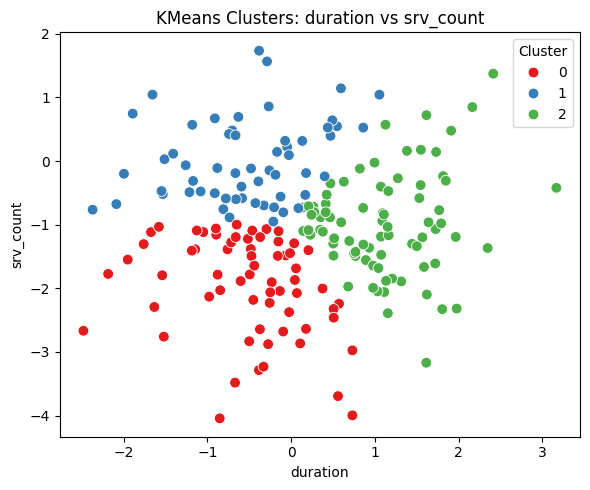

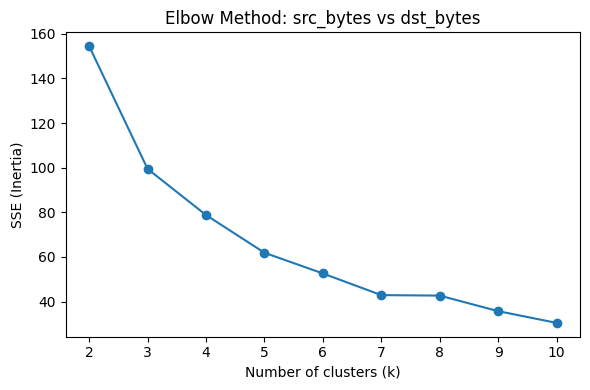

🔸 Features: src_bytes, dst_bytes
➡️ SSE (Inertia): 99.45622533979927
➡️ Silhouette Score: 0.4231


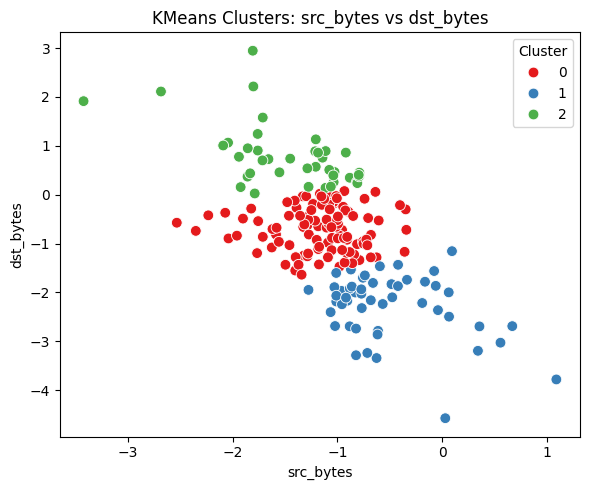

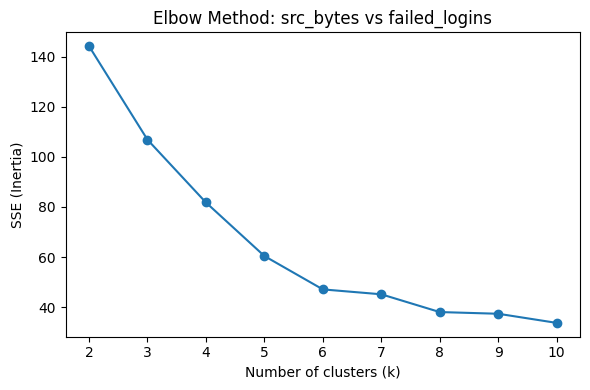

🔸 Features: src_bytes, failed_logins
➡️ SSE (Inertia): 106.85206091278859
➡️ Silhouette Score: 0.3368


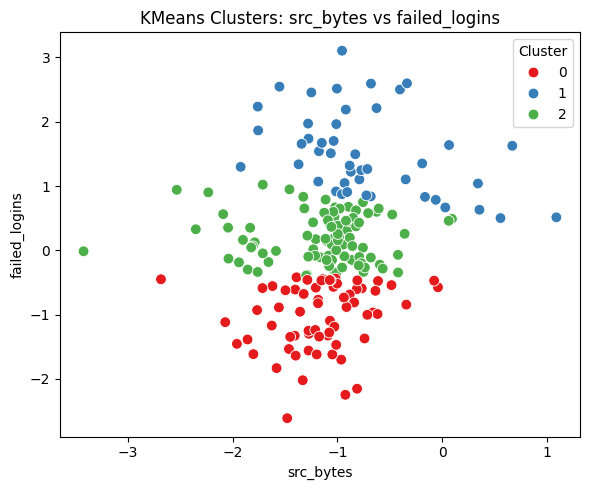

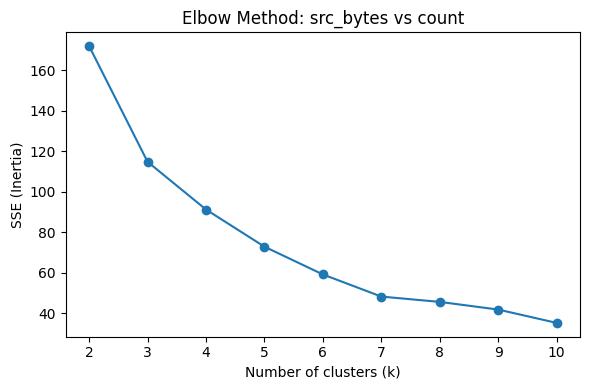

🔸 Features: src_bytes, count
➡️ SSE (Inertia): 114.75686889305838
➡️ Silhouette Score: 0.4167


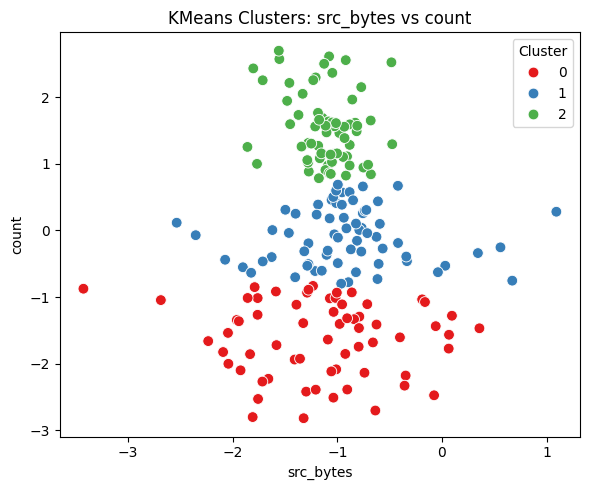

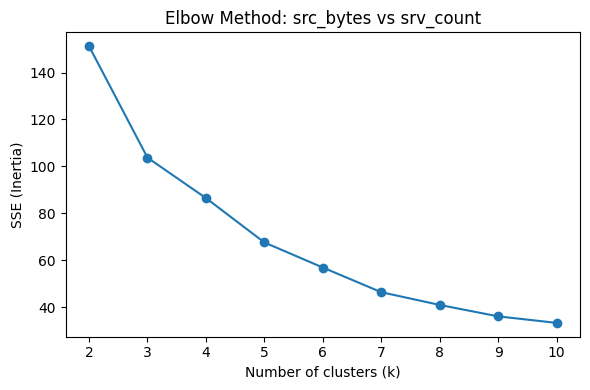

🔸 Features: src_bytes, srv_count
➡️ SSE (Inertia): 103.70065201292158
➡️ Silhouette Score: 0.3764


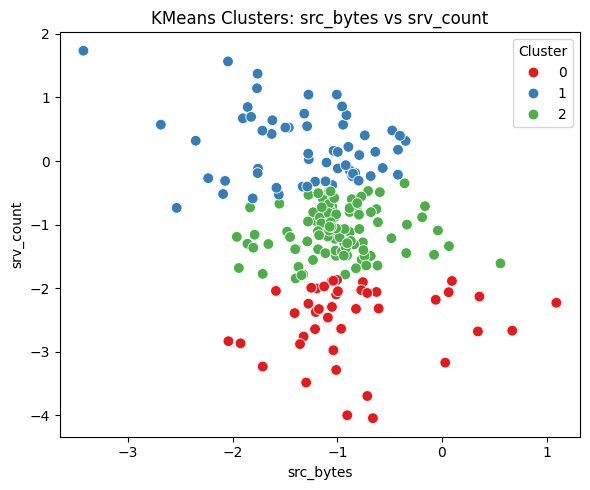

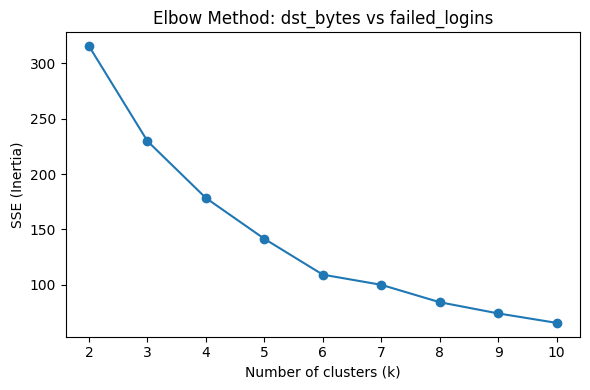

🔸 Features: dst_bytes, failed_logins
➡️ SSE (Inertia): 229.74772437606714
➡️ Silhouette Score: 0.3034


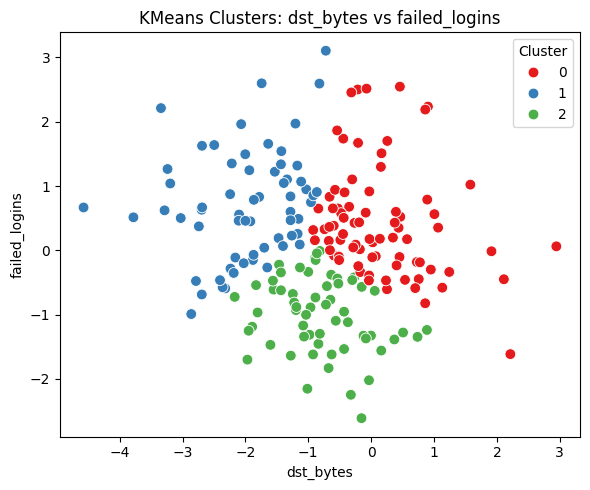

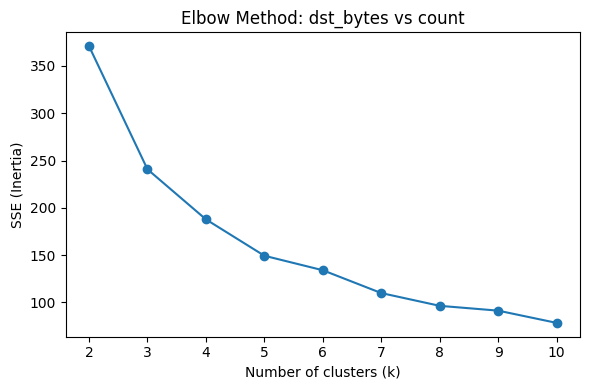

🔸 Features: dst_bytes, count
➡️ SSE (Inertia): 240.67775907554412
➡️ Silhouette Score: 0.3859


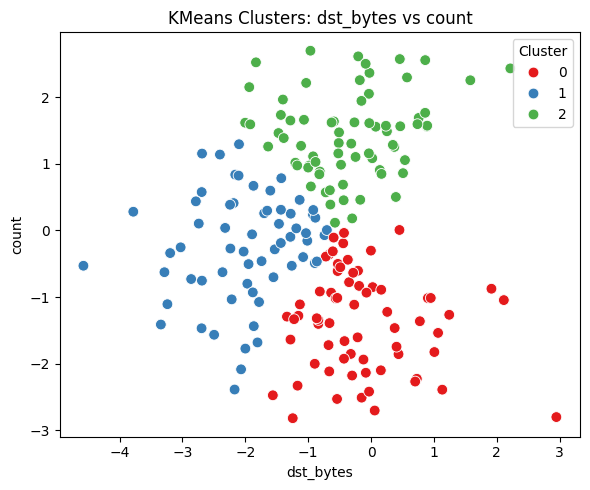

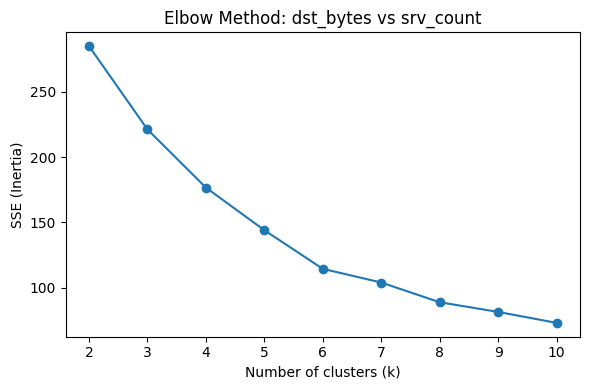

🔸 Features: dst_bytes, srv_count
➡️ SSE (Inertia): 221.20287463625726
➡️ Silhouette Score: 0.3130


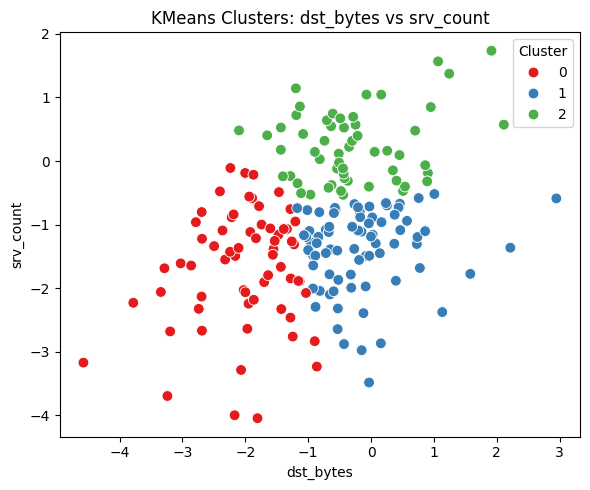

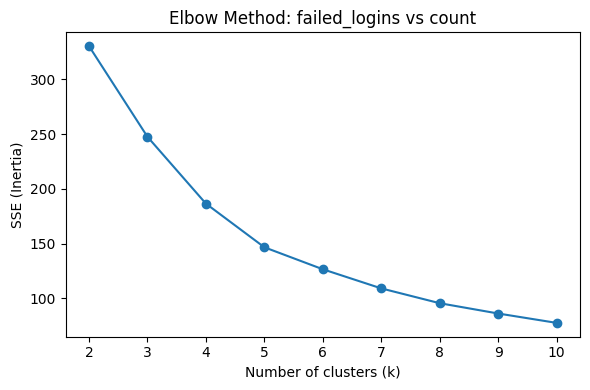

🔸 Features: failed_logins, count
➡️ SSE (Inertia): 247.56326740890108
➡️ Silhouette Score: 0.3454


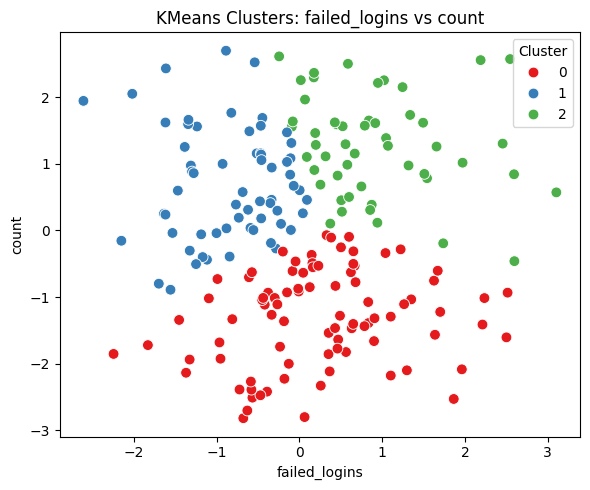

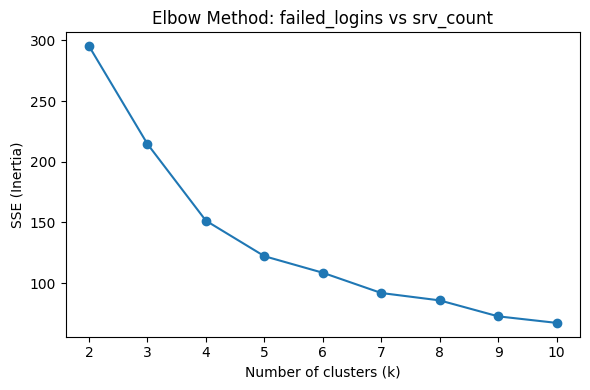

🔸 Features: failed_logins, srv_count
➡️ SSE (Inertia): 214.56697144200484
➡️ Silhouette Score: 0.3118


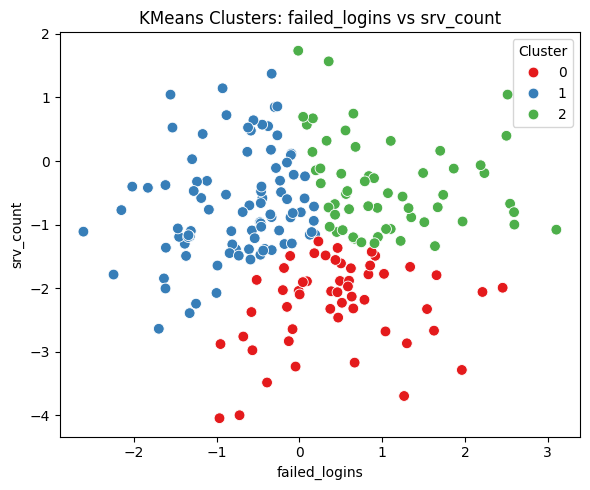

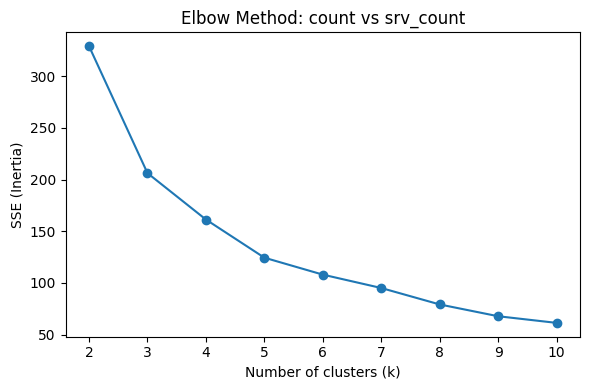

🔸 Features: count, srv_count
➡️ SSE (Inertia): 206.218510244057
➡️ Silhouette Score: 0.4222


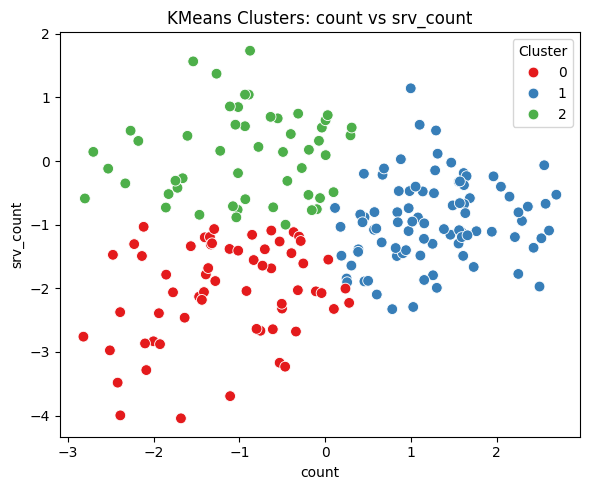

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
from itertools import combinations
# Keep only the specified features
features = ['duration', 'src_bytes', 'dst_bytes', 'failed_logins', 'count', 'srv_count']
df_selected = df[features].dropna()

# Loop over every pair of features
for pair in combinations(features, 2):
    X = df_selected[list(pair)]

    # Elbow Method - to find the optimal number of clusters
    sse = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('SSE (Inertia)')
    plt.title(f'Elbow Method: {pair[0]} vs {pair[1]}')
    plt.tight_layout()
    plt.show()

    # Set a value for k (e.g., 3 or pick based on the elbow curve)
    best_k = 3
    model = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = model.fit_predict(X)

    # Save the model
    joblib.dump(model, f'kmeans_{pair[0]}_{pair[1]}.joblib')

    # Calculate Silhouette Score
    sil_score = silhouette_score(X, cluster_labels)

    # Print the results
    print(f"🔸 Features: {pair[0]}, {pair[1]}")
    print(f"➡️ SSE (Inertia): {model.inertia_}")
    print(f"➡️ Silhouette Score: {sil_score:.4f}")

    # Plot the clusters
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=X, x=pair[0], y=pair[1], hue=cluster_labels, palette='Set1', s=60)
    plt.title(f'KMeans Clusters: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(title="Cluster", loc="best")
    plt.tight_layout()
    plt.show()

***Task5***

Now is the time to compare classification and clsutering algorithms

Please explain the differences in EDA for classification and clustering models.
What are the metrics used for evaluating clustering model. Please list and explain the purpose of each metric.

Please feel free to ask for help.✌


In [ ]:
# Summarise task 5 answer here
#In classification, EDA is guided by the presence of labeled data, so we analyze how features relate to the known target,
#check class balance, and look for patterns that distinguish categories.
#In clustering, since there are no labels, EDA focuses on understanding the structure of the data—looking for natural groupings, spread, and relationships between features.
#To evaluate clustering models, we use metrics like SSE (measuring how tight clusters are), Silhouette Score (assessing how well-separated clusters are

In [ ]:
# By the end of these tasks you should cover good range from the CW1 and CW2 requirments.

# This is the end of the lab don't forgot to submit and all the best!
